In [3]:
import pandas as pd

df=pd.read_csv(r"C:\Users\HP\Desktop\Intern\Housing.csv")

print(df.head())
print("Information")
print(df.info())
print("Check missing values")
print(df.isnull().sum())
print("Describe")
df.describe()

        price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0  13300000.0  7420.0       4.0          2        3      yes        no   
1         NaN  8960.0       4.0          4        4      yes        no   
2  12250000.0  9960.0       3.0          2        2      yes        no   
3  12215000.0  7500.0       NaN          2        2      yes        no   
4  11410000.0  7420.0       4.0          1        2      yes       yes   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0       no              no             yes        2      yes        furnished  
1       no              no             yes        3       no        furnished  
2      yes              no              no        2      yes   semi-furnished  
3      yes             NaN             yes        3      yes        furnished  
4      yes              no             yes        2       no        furnished  
Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 

,price,area,bedrooms,bathrooms,stories,parking
count,5.480000e+02,547.000000,548.000000,549.000000,549.000000,549.000000
mean,4.737760e+06,5132.488117,2.961679,1.284153,1.803279,0.692168
std,1.848571e+06,2174.599104,0.735860,0.501225,0.865766,0.861776
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3577.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4510.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df['price'] = df['price'].fillna(df['price'].median())
df['area'] = df['area'].fillna(df['area'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])


print(df.isnull().sum())

In [8]:
categorical_cols = ['mainroad', 'hotwaterheating', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [12]:
print(df.head())

        price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0  13300000.0  7420.0       4.0          2        3      yes        no   
1   4340000.0  8960.0       4.0          4        4      yes        no   
2  12250000.0  9960.0       3.0          2        2      yes        no   
3  12215000.0  7500.0       3.0          2        2      yes        no   
4  11410000.0  7420.0       4.0          1        2      yes       yes   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0       no              no             yes        2      yes        furnished  
1       no              no             yes        3       no        furnished  
2      yes              no              no        2      yes   semi-furnished  
3      yes              no             yes        3      yes        furnished  
4      yes              no             yes        2       no        furnished  


In [14]:
for col in binary_cols:
    print(col, df[col].unique())


NameError: name 'binary_cols' is not defined

In [16]:
binary_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]

# Fill missing values first
for col in binary_cols:
    df[col] = df[col].fillna('no')

# Normalize text
for col in binary_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()

# Map yes/no
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})



In [18]:
print(df.head())

        price    area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000.0  7420.0       4.0          2        3         1          0   
1   4340000.0  8960.0       4.0          4        4         1          0   
2  12250000.0  9960.0       3.0          2        2         1          0   
3  12215000.0  7500.0       3.0          2        2         1          0   
4  11410000.0  7420.0       4.0          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  


In [20]:
df['furnishingstatus'] = (
    df['furnishingstatus']
    .str.lower()
    .str.strip()
    .map({
        'unfurnished': 0,
        'semi-furnished': 1,
        'furnished': 2
    })
)


In [22]:
print(df.head())

        price    area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000.0  7420.0       4.0          2        3         1          0   
1   4340000.0  8960.0       4.0          4        4         1          0   
2  12250000.0  9960.0       3.0          2        2         1          0   
3  12215000.0  7500.0       3.0          2        2         1          0   
4  11410000.0  7420.0       4.0          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 2  


In [24]:
print(df.isnull().sum())
print(df.dtypes)
print(df.head())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
price               float64
area                float64
bedrooms            float64
bathrooms             int64
stories               int64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus      int64
dtype: object
        price    area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000.0  7420.0       4.0          2        3         1          0   
1   4340000.0  8960.0       4.0          4        4         1          0   
2  12250000.0  9960.0       3.0          2        2         1          0   
3  12215000.0  7500

In [26]:
df.to_csv("clean_housing_data.csv", index=False)


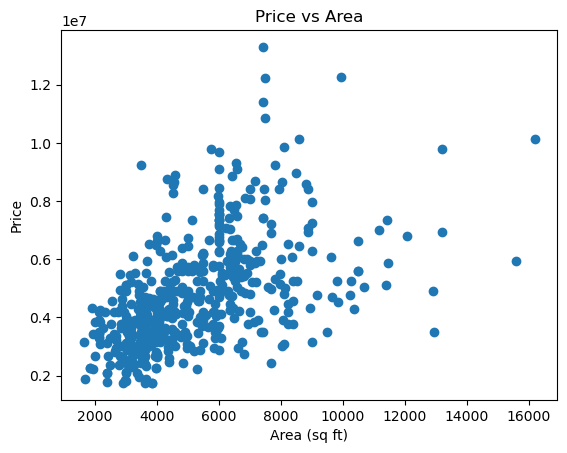

In [28]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['area'], df['price'])
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()


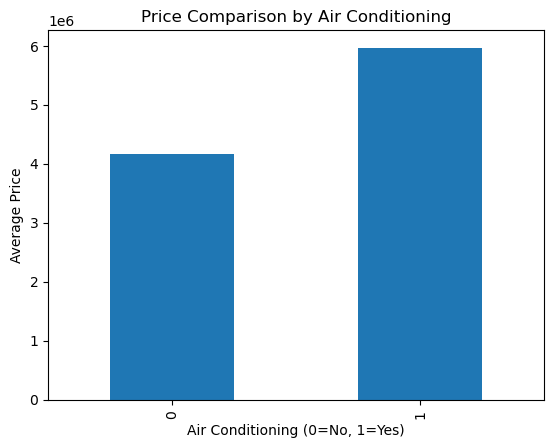

In [30]:
plt.figure()
df.groupby('airconditioning')['price'].mean().plot(kind='bar')
plt.xlabel('Air Conditioning (0=No, 1=Yes)')
plt.ylabel('Average Price')
plt.title('Price Comparison by Air Conditioning')
plt.show()
